# EEL891 - Aprendizado de Máquina
# Trabalho 2: 
# Regressao Multivariável - Estimar o Preço de um Imóvel 
# Aluno: Leonardo Gomes de Castro e Silva
# ID do Kaggle: 7074490

# Introdução

O trabalho tem como objetivo a contrução de um modelo de aprendizado de máquina para estimar o preço de um imóvel. Dessa forma, utiliza-se metodos de regressão em uma base de dados com diversos imóveis, suas caracteristicas e preço anunciado.

# Bibliotecas e Bases de Dados

Primeiramente, é necessario importar as bibliotecas de aprendizado de máquina, tratamento e processamento de dados e os cojuntos de dados de treino e teste fornecido através do Kaggle. Para este trabalho, utilizou a biblioteca Pycaret que trata e pré-processa automaticamente os dados na contrução do modelo, além de abstrair o uso do sci-kit para uma forma mais simples e intuitiva. 

In [1]:
import pandas as pd
import math
from sklearn.preprocessing import LabelBinarizer

from pandas_profiling import ProfileReport

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.regression import *
# instalar pip install pandas-profilling
#pip install shap
#pip install scikit-plot
#pip install pycaret

In [2]:
data = pd.read_csv('conjunto_de_treinamento.csv')
test = pd.read_csv('conjunto_de_teste.csv')

# Tratamento e Pré-processamento dos Dados

A base de dados possui diversas características sobre o imóvel, como seu tipo, número de quartos, suites, vagas, areas comuns, etc.

In [3]:
data.head(10)

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,churrasqueira,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
0,2000,Casa,Imbiribeira,Imobiliaria,3,3,5,223,167,piscina e copa,0,0,1,0,0,0,0,0,0,0,1000000.0
1,2001,Apartamento,Casa Amarela,Imobiliaria,4,4,2,157,0,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0,680000.0
2,2002,Apartamento,Encruzilhada,Imobiliaria,3,1,0,53,0,nenhum,0,0,0,0,0,0,0,0,0,0,450000.0
3,2003,Apartamento,Boa Viagem,Imobiliaria,4,3,2,149,0,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0,1080000.0
4,2004,Apartamento,Rosarinho,Imobiliaria,2,1,1,54,0,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0,350000.0
5,2005,Apartamento,Boa Vista,Imobiliaria,3,0,1,130,0,playground,0,0,0,1,0,0,0,0,0,0,490000.0
6,2006,Apartamento,Rosarinho,Imobiliaria,4,2,0,105,0,piscina e playground,0,0,1,1,0,0,0,0,0,0,680000.0
7,2007,Apartamento,Espinheiro,Imobiliaria,3,1,1,124,0,nenhum,0,0,0,0,0,0,0,0,0,0,390000.0
8,2008,Apartamento,Boa Viagem,Imobiliaria,4,4,3,170,0,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0,1350000.0
9,2009,Apartamento,Boa Viagem,Imobiliaria,3,1,1,72,0,nenhum,0,0,0,0,0,0,0,0,0,0,400000.0


Como a biblioteca Pycaret abstrai o tratamento e préprocessamento dos dados, precisamos apenas substituir os valores vazios ou null (NaN) para 0.
O descarte e seleção das melhores características, e a eliminação dos outliers são feitas pelo Pycaret.

In [4]:
data = data.replace(np.nan,0)
data = data.replace('',0)

test = test.replace(np.nan,0)
test = test.replace('',0)

binarizer = LabelBinarizer()
for indice in ['tipo_vendedor']:
    data[indice] = binarizer.fit_transform(data[indice])

binarizer = LabelBinarizer()
for indice in ['tipo_vendedor']:
    test[indice] = binarizer.fit_transform(test[indice])

In [5]:
data.head(10)

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,churrasqueira,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
0,2000,Casa,Imbiribeira,0,3,3,5,223,167,piscina e copa,0,0,1,0,0,0,0,0,0,0,1000000.0
1,2001,Apartamento,Casa Amarela,0,4,4,2,157,0,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0,680000.0
2,2002,Apartamento,Encruzilhada,0,3,1,0,53,0,nenhum,0,0,0,0,0,0,0,0,0,0,450000.0
3,2003,Apartamento,Boa Viagem,0,4,3,2,149,0,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0,1080000.0
4,2004,Apartamento,Rosarinho,0,2,1,1,54,0,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0,350000.0
5,2005,Apartamento,Boa Vista,0,3,0,1,130,0,playground,0,0,0,1,0,0,0,0,0,0,490000.0
6,2006,Apartamento,Rosarinho,0,4,2,0,105,0,piscina e playground,0,0,1,1,0,0,0,0,0,0,680000.0
7,2007,Apartamento,Espinheiro,0,3,1,1,124,0,nenhum,0,0,0,0,0,0,0,0,0,0,390000.0
8,2008,Apartamento,Boa Viagem,0,4,4,3,170,0,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0,1350000.0
9,2009,Apartamento,Boa Viagem,0,3,1,1,72,0,nenhum,0,0,0,0,0,0,0,0,0,0,400000.0


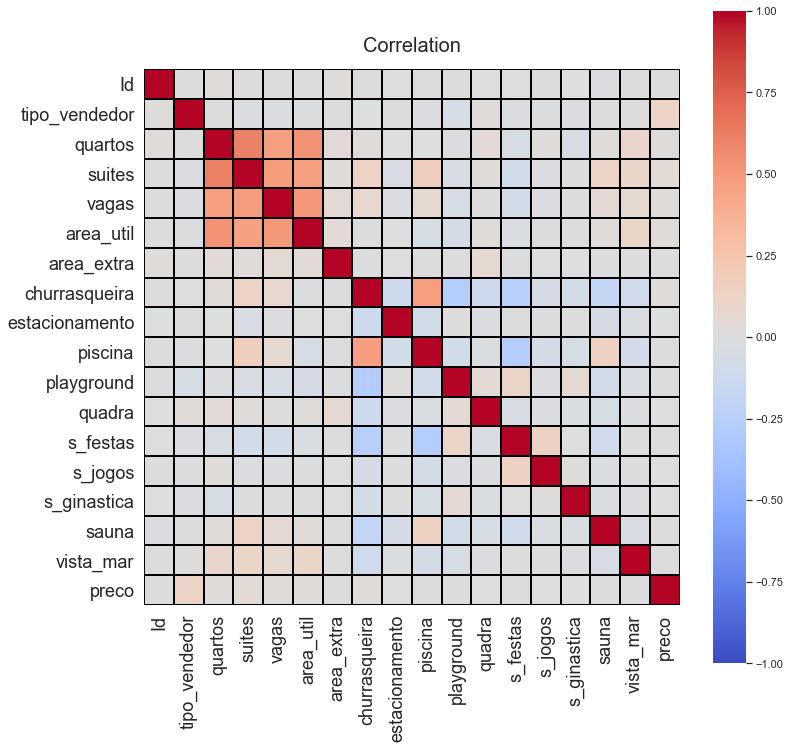

In [6]:
sns.set(font_scale=10)
f = plt.figure(figsize=(12, 12))

sns.set_theme(style="white")

heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black',square=True)

heatmap.set_title('Correlation', fontdict={'fontsize':20}, pad=18)

size = heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 18)
size = heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 18)

O ID do apartamento é irrelevante para analise, logo pode ser descartado. É necessário apenas guardar os IDs da base de test para posterior apresentação dos resultados no Kaggle

In [7]:
id_solicitante_test = test["Id"].to_frame()

data = data.drop(['Id'],axis=1)
test = test.drop(['Id'],axis=1)

# Modelos de Machine Learning 

Inicializando o Pycaret com a base de treino e definindo o target como o preço, temos:

In [8]:
rgs = setup(data = data,  target = 'preco', silent = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,preco
2,Original Data,"(4683, 20)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,16
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3278, 193)"


Com o Pycaret inicializado, pode-se construir diversos modelos de regressão diferentes para avaliar suas métricas, em especial a raiz quadrada do erro pencentual quadrático médio (RMSPE ou RMSLE) que é a métrica a ser minimizada. 

In [9]:
model_compare = compare_models(n_select = 5, sort = 'RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,388034.8125,72949500799385.5938,4354788.2281,-128.1733,0.3261,0.6148,0.4310
huber,Huber Regressor,300704.7104,36739742904565.1719,2569576.7292,0.4388,0.3386,0.2299,0.2190
rf,Random Forest Regressor,347374.5666,52234404979568.0000,3819543.4859,-54.5580,0.3528,0.5258,0.3800
catboost,CatBoost Regressor,388573.9141,70562093471137.2188,4408712.2380,-119.4707,0.3594,0.6654,0.8960
knn,K Neighbors Regressor,332385.6969,38174899326156.7969,2888485.4625,-4.4917,0.3661,0.3480,0.0410
gbr,Gradient Boosting Regressor,414586.6787,71071122576745.0312,4470594.9151,-121.2424,0.3679,0.7199,0.1490
et,Extra Trees Regressor,418858.3820,74206655662779.8438,5011882.5865,-130.6694,0.3717,0.9015,0.5430
dt,Decision Tree Regressor,432155.7964,74428939618173.5000,4721964.7104,-132.5260,0.3915,0.7966,0.0210
par,Passive Aggressive Regressor,350960.5930,36823401669881.5234,2672366.6661,0.1491,0.4052,0.3142,0.0250
lightgbm,Light Gradient Boosting Machine,452891.0065,40416370235272.4844,3642355.1881,-11.7034,0.5810,0.8179,0.1780


# Definição do Modelo e Otimização dos Parâmetros

A partir da tabela comparativa, é possível observar que o modelo de Huber regressor apresenta os melhores resultados. Portanto, iremos utilizar o modelo de huber para prever os preços dos imóveis.

In [10]:
model = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,185069.9793,171043284927.6857,413573.7962,0.5006,0.3187,0.2620
1,161530.5190,193624544071.6662,440027.8901,0.3131,0.3038,0.2401
2,205912.5282,244996487382.8142,494971.1985,0.5765,0.3104,0.2173
3,177192.8875,144381900065.6918,379976.1836,0.5792,0.3073,0.2387
4,375133.6918,12987608397359.5723,3603832.4597,-0.0010,0.4799,0.2419
5,206640.2369,271067642556.5594,520641.5682,0.4547,0.3354,0.2650
6,168291.2123,169908975883.7054,412200.1648,0.5724,0.3234,0.2315
7,176482.1298,135487331925.2772,368086.0388,0.6468,0.2896,0.2166
8,150164.2383,75104406007.3525,274051.8309,0.7508,0.2446,0.1847
9,1200629.6805,353004206075471.4375,18788406.1611,-0.0050,0.4725,0.2011


Aplicando a otimização por hyperparâmetros do Pycaret, temos:

In [18]:
tuned_model = tune_model(model, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,185403.9278,163904878824.3906,404851.6751,0.5214,0.3152,0.2638
1,165139.0381,198150178709.3640,445140.6280,0.2971,0.3176,0.2482
2,207752.9047,237820961010.1850,487668.9051,0.5889,0.3134,0.2251
3,178760.1812,151815493071.5282,389635.0768,0.5575,0.3097,0.2418
4,377267.8054,12999471202682.4043,3605477.9437,-0.0019,0.5207,0.2511
5,207092.2466,263961142025.0238,513771.4881,0.4690,0.3391,0.2690
6,167727.4808,168112644130.0002,410015.4194,0.5769,0.3325,0.2305
7,179956.7624,136157720659.6919,368995.5564,0.6451,0.3025,0.2262
8,147812.3089,72686840508.6563,269604.9712,0.7588,0.2463,0.1866
9,1199999.7023,353052351087889.2500,18789687.3600,-0.0051,0.4773,0.2020


Com o modelo otimizado, pode-se identificar qual foi o melhor conjunto de parâmetros, além de verificar como o Pycaret eliminou os outlier e quais caracteristicas são mais importantes no modelo.

In [12]:
evaluate_model(tuned_model)
evaluate_model(tuned_model)
evaluate_model(tuned_model)
evaluate_model(tuned_model)
evaluate_model(tuned_model)
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Resultado

Avaliando o modelo de regressão de Huber para a base de treino

In [19]:
predict = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,625595.1447,282108172029322.8125,16796076.0902,-0.0004,0.3989,0.4063


Aplicando o modelo de regressão da base de teste:

In [20]:
predictions = predict_model(tuned_model, data=test)
predictions.head(5)

,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,churrasqueira,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,Label
0,Apartamento,Pina,0,4,4,3,182,0,copa e playground,0,0,0,1,0,0,0,0,0,0,1.373431e+06
1,Apartamento,Tamarineira,0,2,0,1,85,0,nenhum,0,0,0,0,0,0,0,0,0,0,2.609007e+05
2,Apartamento,Boa Viagem,0,3,1,2,115,20,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0,6.682856e+05
3,Apartamento,Iputinga,0,3,0,1,92,0,nenhum,0,0,0,0,0,0,0,0,0,0,3.008989e+05
4,Apartamento,Engenho do Meio,0,3,1,1,65,0,piscina e copa,0,0,1,0,0,0,0,0,0,0,3.803209e+05


Para finalizar, formatamos o resultado no modelo para submissão no Kaggle e expotamos em formato CSV.

In [21]:
result = {'Id': id_solicitante_test['Id'], 'preco': predictions['Label'].tolist()}

In [22]:
result_frame = pd.DataFrame(data=result)

In [23]:
result_frame.to_csv (r'answer.csv', index = False, header=True)